In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("F:\Machine Learning\data_cleaned.csv")

In [5]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
data.shape

(891, 25)

In [8]:
x  = data.drop(['Survived'],axis=1)


In [9]:
y=data['Survived']

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

In [12]:
from sklearn.model_selection import train_test_split as tt

In [13]:
x_train,x_test,y_train,y_test = tt(x,y,random_state=92,stratify=y)

In [14]:
cl = knn(n_neighbors =3)



In [15]:
cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
train_pred = cl.predict(x_train)
f1_train = f1_score(y_train,train_pred)


In [17]:
f1_train

0.8161616161616162

In [18]:
test_pred = cl.predict(x_test)
f1_test=f1_score(y_test,test_pred)

In [19]:
f1_test

0.7199999999999999

In [20]:
def F1score(k):
    f1_train1 = []
    f1_test1 = []
    for i in k:
         clf = knn(n_neighbors=i)
         clf.fit(x_train,y_train)
         tmp = clf.predict(x_train)
         tmp = f1_score(tmp,y_train)
         f1_train1.append(tmp)

         tmp = clf.predict(x_test)
         tmp = f1_score(tmp,y_test)
         f1_test1.append(tmp)
    return f1_train1,f1_test1



In [21]:
k = range(1,150)
k


range(1, 150)

In [22]:
F1_train,F2_test = F1score(k)

In [23]:
score = pd.DataFrame({'Train score':F1_train,'Test score':F2_test},index=k)
score

,Train score,Test score
1,0.978131,0.637363
2,0.775120,0.625000
3,0.816162,0.720000
4,0.759382,0.748466
5,0.776892,0.715909
...,...,...
145,0.544474,0.516129
146,0.534060,0.516129
147,0.549865,0.516129
148,0.531507,0.504065


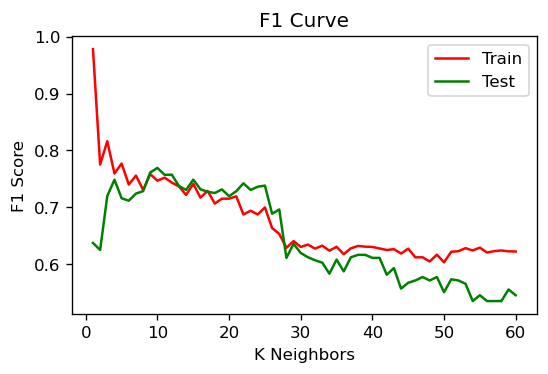

In [29]:
fig = plt.figure(figsize=(5,3),dpi=120)
plt.plot(score['Train score'].head(60),color='red',label='Train')
plt.plot(score['Test score'].head(60),color='green',label='Test')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')

plt.legend()
plt.show()